# Goal
1 ***To find out the relationship between flight status and different weather factors***

2 ***To build a machine learning model to predict flight status by weather features***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load `weather.csv` and `flight_traffic.csv`

In [2]:
df_weather = pd.read_csv('weather.csv')
df_weather.head()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN


In [3]:
df_flight_traffic = pd.read_csv('flight_traffic.csv')
df_flight_traffic.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,...,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,...,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,...,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


## Analyze `df_weather`

In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353864 entries, 0 to 353863
Data columns (total 12 columns):
airport_id        353864 non-null object
airport_name      353864 non-null object
latitude          353864 non-null float64
longitude         353864 non-null float64
elevation         353864 non-null float64
datetime          353864 non-null object
temperature       353864 non-null float64
visibility        353864 non-null int64
wind_direction    353864 non-null int64
wind_speed        353864 non-null float64
snow_depth        161 non-null float64
cloud_status      219924 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 32.4+ MB


In [5]:
df_weather.describe()

,latitude,longitude,elevation,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
count,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,161.000000,219924.0
mean,39.274844,-97.731652,381.337180,15.689767,16853.622745,326.495860,7.193903,13.142857,9.0
std,8.424115,21.302403,541.440381,47.625813,43579.156542,315.626276,59.468636,14.473189,0.0
min,17.699700,-176.650000,1.200000,-45.000000,0.000000,4.000000,0.000000,0.000000,9.0
25%,33.565560,-108.540000,29.000000,5.600000,16093.000000,130.000000,2.100000,5.000000,9.0
50%,39.483800,-92.838890,187.500000,15.000000,16093.000000,220.000000,3.100000,8.000000,9.0
75%,43.116700,-82.537500,389.200000,22.800000,16093.000000,330.000000,5.100000,15.000000,9.0
max,71.283400,-64.812500,2353.100000,999.900000,999999.000000,999.000000,999.900000,79.000000,9.0


+ *`snow_depth` and `cloud_status` have `NaN` values*
+ *`temperature`, `visibility`, `wind_direction`, `wind_speed` have abnormal values such as `999.0`*

## Clean data in `df_weather`

- **Alter abnormal values in `temperature`**

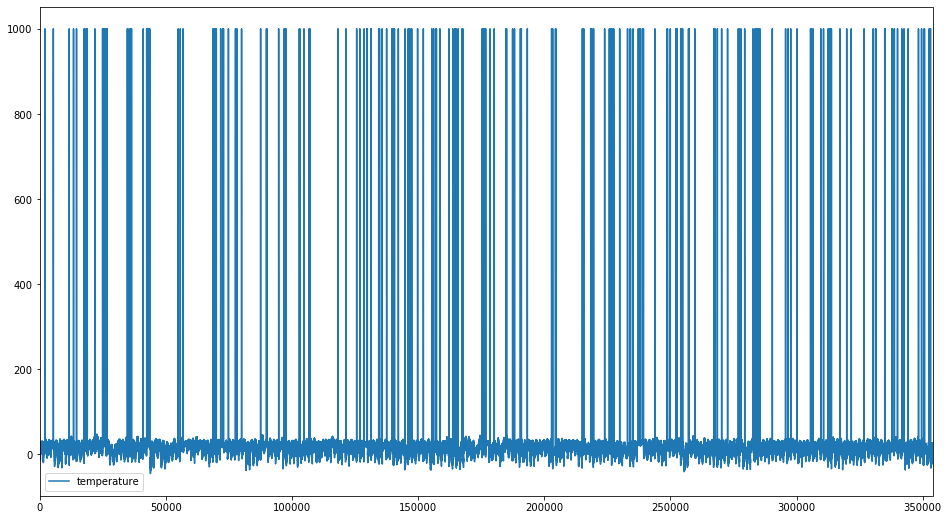

In [6]:
df_weather.plot(y = 'temperature', figsize=(16, 9))

c:\users\chendaoyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


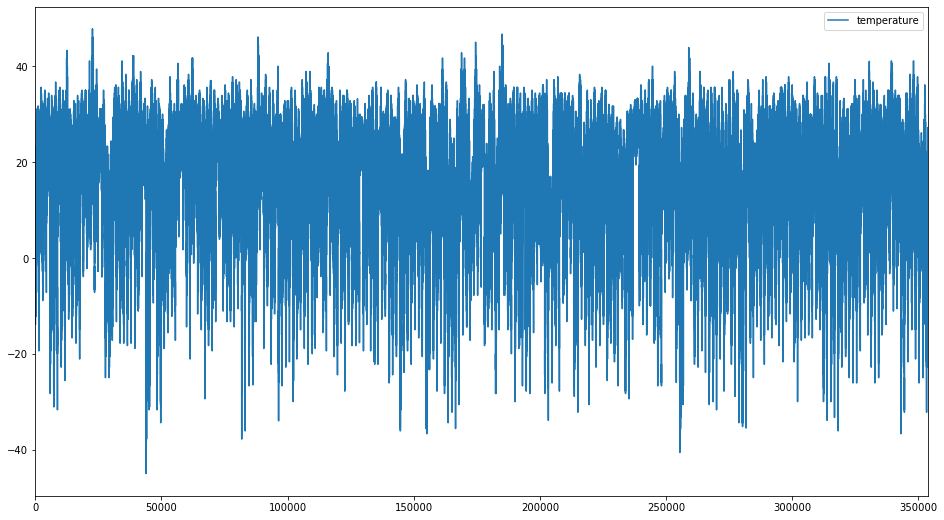

In [7]:
df_weather['temperature'][df_weather['temperature'] > 100] = np.nan
df_weather['temperature'].fillna(method='bfill', inplace = True)
df_weather.plot(y = 'temperature', figsize=(16, 9))

- **Alter abnormal values in `visibility`**

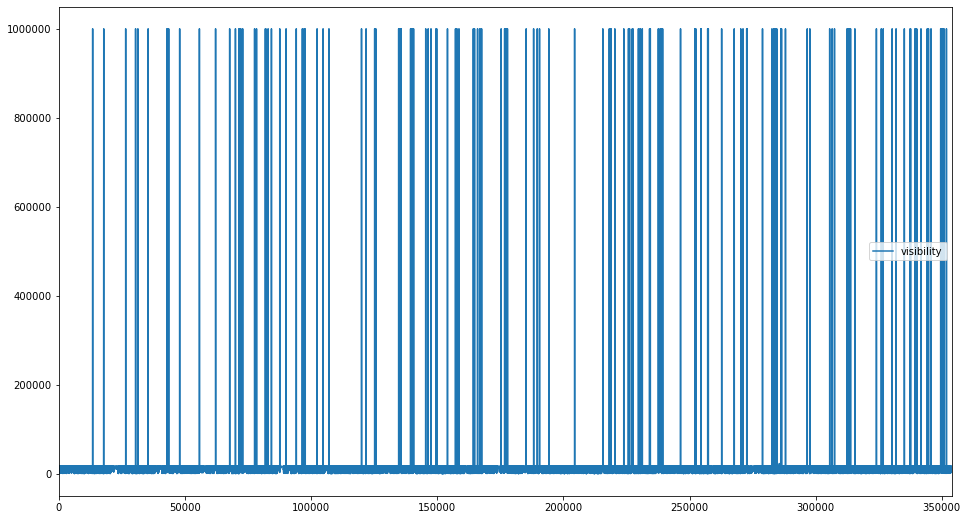

In [8]:
df_weather.plot(y = 'visibility', figsize=(16, 9))

c:\users\chendaoyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


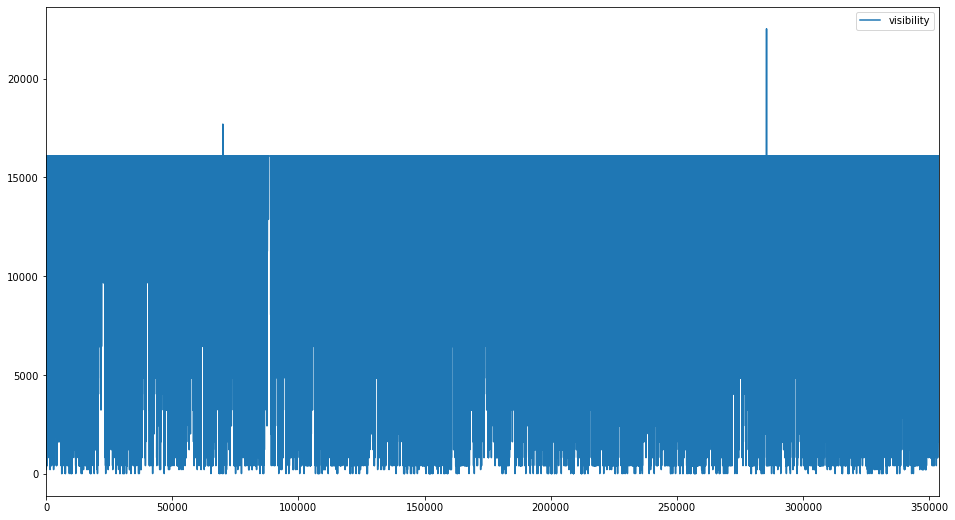

In [9]:
df_weather['visibility'][df_weather['visibility'] > 100000] = np.nan
df_weather['visibility'].fillna(method='bfill', inplace = True)
df_weather.plot(y = 'visibility', figsize=(16, 9))

- **Alter abnormal values in `wind_direction`**

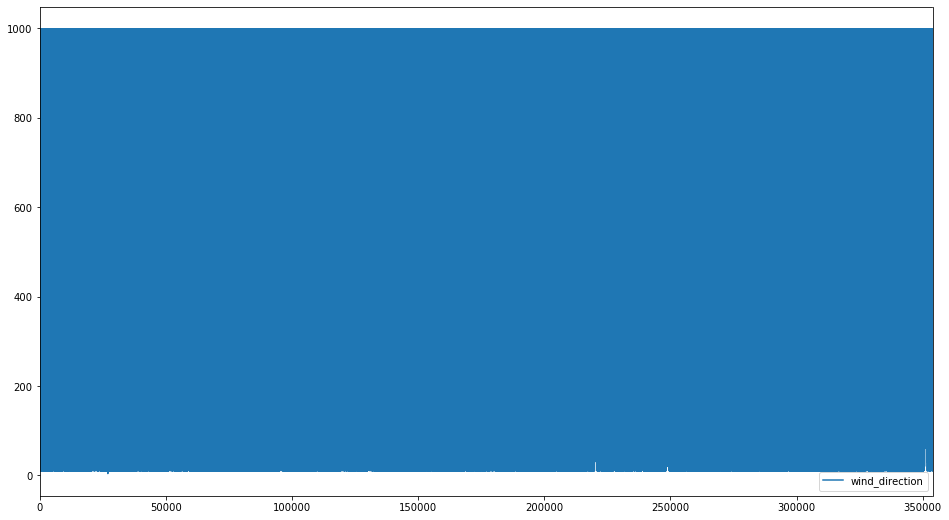

In [10]:
df_weather.plot(y = 'wind_direction', figsize=(16, 9))

c:\users\chendaoyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


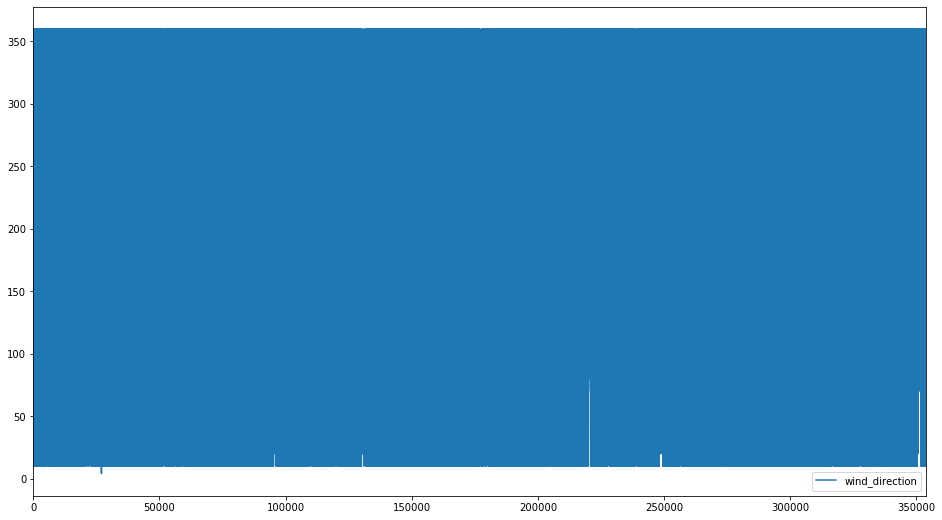

In [11]:
df_weather['wind_direction'][df_weather['wind_direction'] > 360] = np.nan
df_weather['wind_direction'].fillna(method='bfill', inplace = True)
df_weather.plot(y = 'wind_direction', figsize=(16, 9))

- **Alter abnormal values in `wind_speed`**

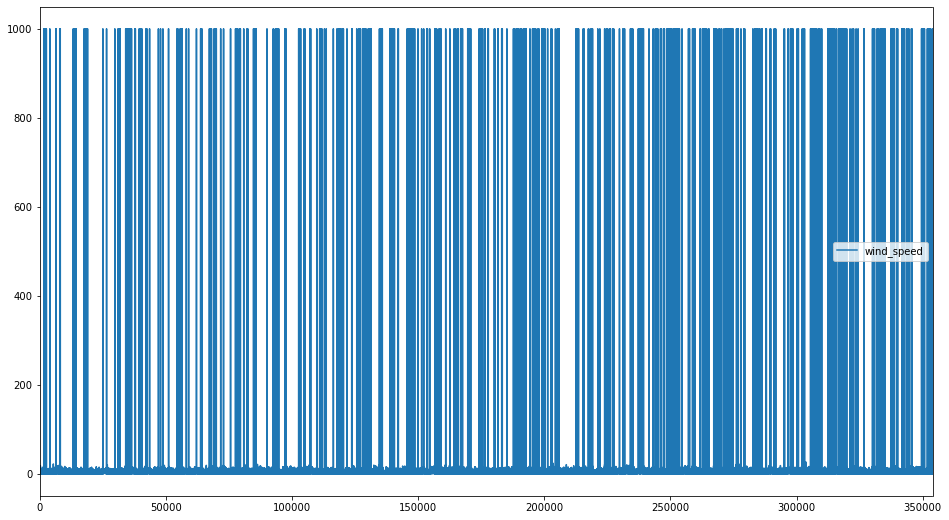

In [12]:
df_weather.plot(y = 'wind_speed', figsize=(16, 9))

c:\users\chendaoyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


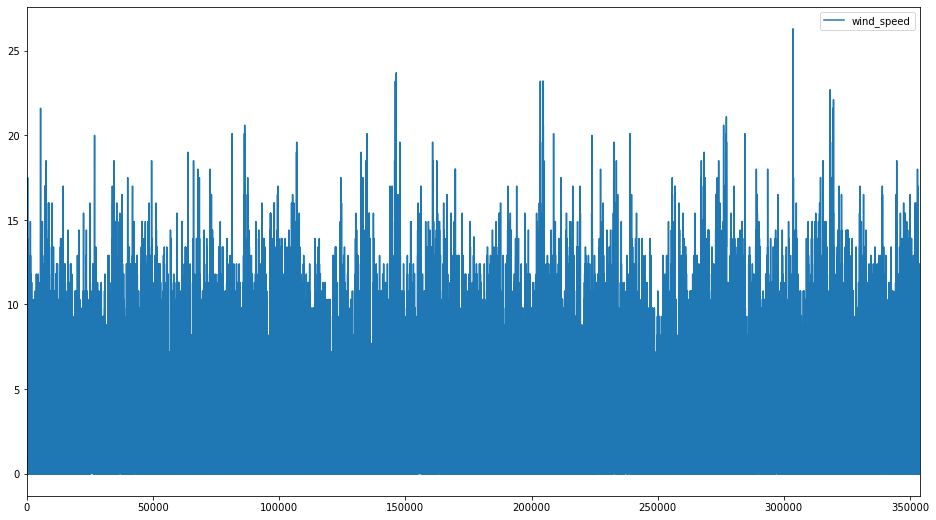

In [13]:
df_weather['wind_speed'][df_weather['wind_speed'] > 100] = np.nan
df_weather['wind_speed'].fillna(method='bfill', inplace = True)
df_weather.plot(y = 'wind_speed', figsize=(16, 9))

- **Replace `NaN` with `0` in `snow_depth`**

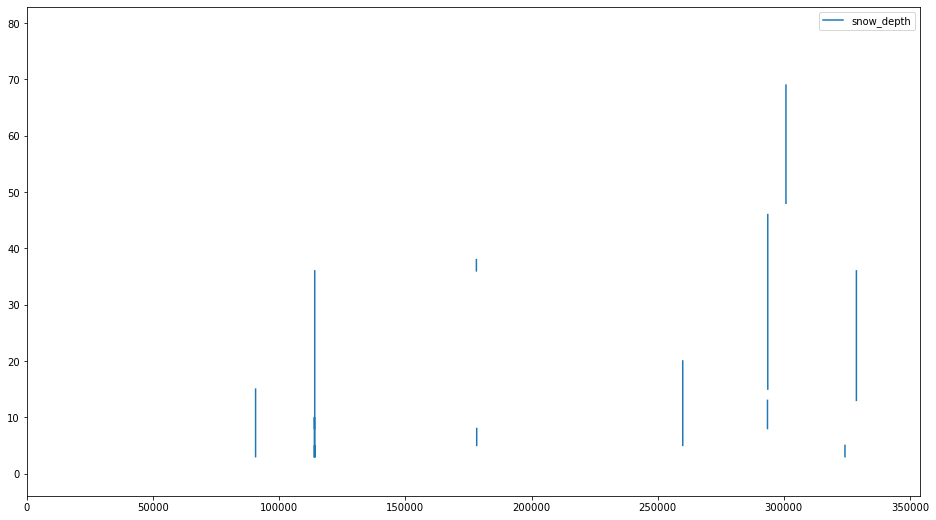

In [14]:
df_weather.plot(y = 'snow_depth', figsize=(16, 9))

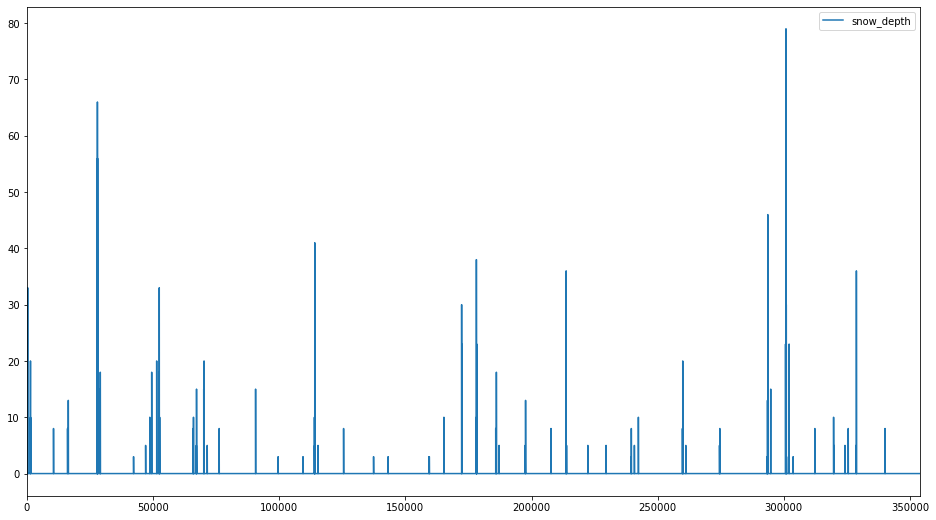

In [15]:
df_weather['snow_depth'].fillna(0, inplace = True)
df_weather.plot(y = 'snow_depth', figsize=(16, 9))

- **Drop `cloud_status` since it only contains either `NaN` or `9` values, which are meaningless**

In [16]:
df_weather.drop('cloud_status', axis = 1, inplace = True)

- **Drop `airport_name`, `latitude`, `longitude`, `elevation` because they are not weather features**

In [17]:
df_weather.drop(['airport_name', 'latitude', 'longitude', 'elevation'], axis = 1, inplace = True)

- **Convert `datetime` to `year`, `month`, `day`, `time`**

In [18]:
df_weather['year'] = df_weather['datetime'].apply(lambda x: x.split('-')[0])
df_weather['month'] = df_weather['datetime'].apply(lambda x: x.split('-')[1])
df_weather['day'] = df_weather['datetime'].apply(lambda x: x.split('-')[2].split('T')[0])
df_weather['time'] = df_weather['datetime'].apply(lambda x: x.split('-')[2].split('T')[1].split(':')[0] + x.split('-')[2].split('T')[1].split(':')[1])
df_weather.head()

,airport_id,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,year,month,day,time
0,BUF,2017-01-01T00:54:00,3.9,16093.0,220.0,7.2,0.0,2017,01,01,0054
1,BUF,2017-01-01T06:54:00,0.6,16093.0,260.0,6.2,0.0,2017,01,01,0654
2,BUF,2017-01-01T12:54:00,-0.6,16093.0,250.0,5.1,0.0,2017,01,01,1254
3,BUF,2017-01-01T18:54:00,2.2,16093.0,240.0,5.7,0.0,2017,01,01,1854
4,BUF,2017-01-02T00:54:00,-0.6,16093.0,170.0,1.5,0.0,2017,01,02,0054


- **Set `time_zone` based on `time`**
    - `0`: time from `1855` to `0054`
    - `1`: time from `0055` to `0654`
    - `2`: time from `0655` to `1254`
    - `3`: time from `1255` to `1854`

In [19]:
df_weather['time_zone'] = df_weather['time'].apply(lambda x: 0 if x == '0054' else 1 if x == '0654' else 2 if x == '1254' else 3)
df_weather.head()

,airport_id,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,year,month,day,time,time_zone
0,BUF,2017-01-01T00:54:00,3.9,16093.0,220.0,7.2,0.0,2017,01,01,0054,0
1,BUF,2017-01-01T06:54:00,0.6,16093.0,260.0,6.2,0.0,2017,01,01,0654,1
2,BUF,2017-01-01T12:54:00,-0.6,16093.0,250.0,5.1,0.0,2017,01,01,1254,2
3,BUF,2017-01-01T18:54:00,2.2,16093.0,240.0,5.7,0.0,2017,01,01,1854,3
4,BUF,2017-01-02T00:54:00,-0.6,16093.0,170.0,1.5,0.0,2017,01,02,0054,0


- **Drop `datetime`**

In [20]:
df_weather.drop('datetime', axis = 1, inplace = True)

- **Convert data type of `year`, `month`, `day`, `time` to `int64`**

In [21]:
df_weather[['year','month','day','time']] = df_weather[['year','month','day','time']].astype('int64')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353864 entries, 0 to 353863
Data columns (total 11 columns):
airport_id        353864 non-null object
temperature       353864 non-null float64
visibility        353864 non-null float64
wind_direction    353860 non-null float64
wind_speed        353864 non-null float64
snow_depth        353864 non-null float64
year              353864 non-null int64
month             353864 non-null int64
day               353864 non-null int64
time              353864 non-null int64
time_zone         353864 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 29.7+ MB


- **Convert data type of `time_zone` to `category`**

In [22]:
df_weather['time_zone'] = df_weather['time_zone'].astype('category')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353864 entries, 0 to 353863
Data columns (total 11 columns):
airport_id        353864 non-null object
temperature       353864 non-null float64
visibility        353864 non-null float64
wind_direction    353860 non-null float64
wind_speed        353864 non-null float64
snow_depth        353864 non-null float64
year              353864 non-null int64
month             353864 non-null int64
day               353864 non-null int64
time              353864 non-null int64
time_zone         353864 non-null category
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 27.3+ MB


- **Set `wind_direction_zone` based on `wind_direction`**
    - `NE`: `0` <= wind_direction < `90`
    - `SE`: `90` <= wind_direction < `180`
    - `SW`: `180` <= wind_direction < `270`
    - `NW`: `270` <= wind_direction < `360`

In [23]:
df_weather['wind_direction_zone'] = df_weather['wind_direction'].apply(lambda x: 'NE' if x >= 0 and x < 90 else 'SE' if x >= 90 and x < 180 else 'SW' if x >= 180 and x < 270 else 'NW')
df_weather.head()

,airport_id,temperature,visibility,wind_direction,wind_speed,snow_depth,year,month,day,time,time_zone,wind_direction_zone
0,BUF,3.9,16093.0,220.0,7.2,0.0,2017,1,1,54,0,SW
1,BUF,0.6,16093.0,260.0,6.2,0.0,2017,1,1,654,1,SW
2,BUF,-0.6,16093.0,250.0,5.1,0.0,2017,1,1,1254,2,SW
3,BUF,2.2,16093.0,240.0,5.7,0.0,2017,1,1,1854,3,SW
4,BUF,-0.6,16093.0,170.0,1.5,0.0,2017,1,2,54,0,SE


- **Convert data type of `wind_direction_zone` to `category`**

In [24]:
df_weather['wind_direction_zone'] = df_weather['wind_direction_zone'].astype('category')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353864 entries, 0 to 353863
Data columns (total 12 columns):
airport_id             353864 non-null object
temperature            353864 non-null float64
visibility             353864 non-null float64
wind_direction         353860 non-null float64
wind_speed             353864 non-null float64
snow_depth             353864 non-null float64
year                   353864 non-null int64
month                  353864 non-null int64
day                    353864 non-null int64
time                   353864 non-null int64
time_zone              353864 non-null category
wind_direction_zone    353864 non-null category
dtypes: category(2), float64(5), int64(4), object(1)
memory usage: 27.7+ MB


- **Drop `time` and `wind_direction`**

In [25]:
df_weather.drop(['time', 'wind_direction'], axis = 1, inplace = True)

- **Done cleaning `df_weather`**

In [26]:
df_weather.head()

,airport_id,temperature,visibility,wind_speed,snow_depth,year,month,day,time_zone,wind_direction_zone
0,BUF,3.9,16093.0,7.2,0.0,2017,1,1,0,SW
1,BUF,0.6,16093.0,6.2,0.0,2017,1,1,1,SW
2,BUF,-0.6,16093.0,5.1,0.0,2017,1,1,2,SW
3,BUF,2.2,16093.0,5.7,0.0,2017,1,1,3,SW
4,BUF,-0.6,16093.0,1.5,0.0,2017,1,2,0,SE


In [27]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353864 entries, 0 to 353863
Data columns (total 10 columns):
airport_id             353864 non-null object
temperature            353864 non-null float64
visibility             353864 non-null float64
wind_speed             353864 non-null float64
snow_depth             353864 non-null float64
year                   353864 non-null int64
month                  353864 non-null int64
day                    353864 non-null int64
time_zone              353864 non-null category
wind_direction_zone    353864 non-null category
dtypes: category(2), float64(4), int64(3), object(1)
memory usage: 22.3+ MB


In [28]:
df_weather.describe()

,temperature,visibility,wind_speed,snow_depth,year,month,day
count,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000
mean,13.523257,14932.607668,3.639130,0.005980,2017.002730,6.502981,15.676376
std,11.592081,3278.567244,2.577425,0.416255,0.052177,3.456551,8.817540
min,-45.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,5.600000,16093.000000,2.100000,0.000000,2017.000000,4.000000,8.000000
50%,15.000000,16093.000000,3.100000,0.000000,2017.000000,7.000000,16.000000
75%,22.800000,16093.000000,5.100000,0.000000,2017.000000,10.000000,23.000000
max,47.800000,22531.000000,26.300000,79.000000,2018.000000,12.000000,31.000000


## Analyze `df_flight_traffic`

In [29]:
df_flight_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567673 entries, 0 to 567672
Data columns (total 24 columns):
year                   567673 non-null int64
month                  567673 non-null int64
day                    567673 non-null int64
airline_id             567673 non-null object
origin_airport         567673 non-null object
destination_airport    567673 non-null object
scheduled_departure    567673 non-null int64
actual_departure       559620 non-null float64
taxi_out               559441 non-null float64
wheels_off             559441 non-null float64
wheels_on              559195 non-null float64
taxi_in                559195 non-null float64
scheduled_arrival      567673 non-null int64
actual_arrival         559195 non-null float64
cancelled              567673 non-null int64
diverted               567673 non-null int64
scheduled_elapsed      567672 non-null float64
actual_elapsed         558137 non-null float64
distance               567673 non-null int64
airline_delay  

In [30]:
df_flight_traffic.describe()

,year,month,day,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
count,567673.0,567673.000000,567673.000000,567673.000000,559620.000000,559441.000000,559441.000000,559195.000000,559195.000000,567673.000000,...,567673.000000,567673.000000,567672.000000,558137.000000,567673.000000,102606.000000,102606.000000,102606.000000,102606.000000,102606.000000
mean,2017.0,6.542909,15.741490,1330.138055,1333.738726,16.759742,1355.668278,1464.290453,7.505046,1488.999338,...,0.014593,0.002207,146.970129,141.690062,856.468541,19.872220,2.751652,15.865164,0.083806,25.340107
std,0.0,3.390609,8.775778,490.640811,504.086954,9.336857,505.981109,533.711712,5.888643,518.789647,...,0.119917,0.046930,77.088542,76.628710,624.533648,62.413858,24.813047,35.569305,2.315777,46.937251
min,2017.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,18.000000,16.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.0,4.000000,8.000000,914.000000,915.000000,11.000000,930.000000,1047.000000,4.000000,1104.000000,...,0.000000,0.000000,90.000000,85.000000,391.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.0,7.000000,16.000000,1324.000000,1328.000000,14.000000,1340.000000,1506.000000,6.000000,1519.000000,...,0.000000,0.000000,128.000000,123.000000,680.000000,1.000000,0.000000,2.000000,0.000000,4.000000
75%,2017.0,9.000000,23.000000,1735.000000,1743.000000,20.000000,1757.000000,1912.000000,9.000000,1920.000000,...,0.000000,0.000000,180.000000,175.000000,1096.000000,17.000000,0.000000,19.000000,0.000000,32.000000
max,2017.0,12.000000,31.000000,2359.000000,2400.000000,176.000000,2400.000000,2400.000000,413.000000,2359.000000,...,1.000000,1.000000,718.000000,726.000000,4983.000000,1895.000000,1336.000000,1138.000000,322.000000,1336.000000


- **Check how many flights were `cancelled`**

In [31]:
print('Number of flights cancelled: ' + str(df_flight_traffic['cancelled'][df_flight_traffic['cancelled'] == 1].sum()))

Number of flights cancelled: 8284


- **Check how many flights were `diverted`**

In [32]:
print('Number of flights diverted: ' + str(df_flight_traffic['diverted'][df_flight_traffic['diverted'] == 1].sum()))

Number of flights diverted: 1253


- **Check how many flights were delayed based on `weather_delay`**

In [33]:
print('Number of flights delayed due to weather: ' + str(len(df_flight_traffic['weather_delay'][df_flight_traffic['weather_delay'].notna() & df_flight_traffic['weather_delay'] != 0])))

Number of flights delayed due to weather: 4860


## Clean data in `df_flight_traffic`

- **Drop `airline_id`, `actual_departure`, `taxi_out`, `wheels_off`, `wheels_on`, `taxi_in`, `actual_arrival`, `scheduled_elapsed`, `actual_elapsed`, `distance` which won't be used in training model**

In [34]:
df_flight_traffic.drop(['airline_id', 'actual_departure', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'actual_arrival', 'scheduled_elapsed', 'actual_elapsed', 'distance'], axis = 1, inplace = True)
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,scheduled_departure,scheduled_arrival,cancelled,diverted,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,CLT,PHX,1619,1856,0,0,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,FLL,CLT,1305,1508,0,0,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,FLL,CLT,1305,1508,0,0,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,FLL,CLT,1305,1508,0,0,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,FLL,CLT,1305,1508,0,0,NaN,NaN,NaN,NaN,NaN


- **Drop rows with delays not related to weather**

In [35]:
df_flight_traffic = df_flight_traffic.loc[df_flight_traffic['weather_delay'] != 0]
df_flight_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469927 entries, 0 to 567672
Data columns (total 14 columns):
year                   469927 non-null int64
month                  469927 non-null int64
day                    469927 non-null int64
origin_airport         469927 non-null object
destination_airport    469927 non-null object
scheduled_departure    469927 non-null int64
scheduled_arrival      469927 non-null int64
cancelled              469927 non-null int64
diverted               469927 non-null int64
airline_delay          4860 non-null float64
weather_delay          4860 non-null float64
air_system_delay       4860 non-null float64
security_delay         4860 non-null float64
aircraft_delay         4860 non-null float64
dtypes: float64(5), int64(7), object(2)
memory usage: 53.8+ MB


- **Drop `airline_delay`, `air_system_delay`, `security_delay`, `aircraft_delay`**

In [36]:
df_flight_traffic.drop(['airline_delay', 'air_system_delay', 'security_delay', 'aircraft_delay'], axis=1, inplace= True)
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,scheduled_departure,scheduled_arrival,cancelled,diverted,weather_delay
0,2017,1,31,CLT,PHX,1619,1856,0,0,NaN
1,2017,1,12,FLL,CLT,1305,1508,0,0,NaN
2,2017,1,14,FLL,CLT,1305,1508,0,0,NaN
3,2017,1,18,FLL,CLT,1305,1508,0,0,NaN
4,2017,1,25,FLL,CLT,1305,1508,0,0,NaN


- **Add a new column `delayed`: `1` if flight was delayed due to weather, `0` otherwise**

In [37]:
df_flight_traffic['delayed'] = df_flight_traffic['weather_delay'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_flight_traffic.describe()

,year,month,day,scheduled_departure,scheduled_arrival,cancelled,diverted,weather_delay,delayed
count,469927.0,469927.000000,469927.000000,469927.000000,469927.000000,469927.000000,469927.000000,4860.000000,469927.000000
mean,2017.0,6.602966,15.788997,1300.825498,1461.848998,0.017628,0.002666,58.093827,0.010342
std,0.0,3.407343,8.782030,492.337896,514.975331,0.131596,0.051568,98.921437,0.101169
min,2017.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.0,4.000000,8.000000,855.000000,1045.000000,0.000000,0.000000,12.000000,0.000000
50%,2017.0,7.000000,16.000000,1255.000000,1450.000000,0.000000,0.000000,27.000000,0.000000
75%,2017.0,10.000000,23.000000,1716.000000,1904.000000,0.000000,0.000000,63.250000,0.000000
max,2017.0,12.000000,31.000000,2359.000000,2359.000000,1.000000,1.000000,1336.000000,1.000000


- **Drop `weather_delay`**

In [38]:
df_flight_traffic.drop('weather_delay', axis=1, inplace= True)
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,scheduled_departure,scheduled_arrival,cancelled,diverted,delayed
0,2017,1,31,CLT,PHX,1619,1856,0,0,0
1,2017,1,12,FLL,CLT,1305,1508,0,0,0
2,2017,1,14,FLL,CLT,1305,1508,0,0,0
3,2017,1,18,FLL,CLT,1305,1508,0,0,0
4,2017,1,25,FLL,CLT,1305,1508,0,0,0


- **Set `flight_status` as the target of prediction**
    - `0`: if flight was on schedule
    - `1`: if flight was delayed
    - `2`: if flight was diverted
    - `3`: if flight was cancelled

In [39]:
df_flight_traffic['flight_status'] = df_flight_traffic[['cancelled', 'diverted', 'delayed']].apply(lambda x: 1 if x[2] == 1 else 2 if x[1] == 1 else 3 if x[0] == 1 else 0, axis = 1)
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,scheduled_departure,scheduled_arrival,cancelled,diverted,delayed,flight_status
0,2017,1,31,CLT,PHX,1619,1856,0,0,0,0
1,2017,1,12,FLL,CLT,1305,1508,0,0,0,0
2,2017,1,14,FLL,CLT,1305,1508,0,0,0,0
3,2017,1,18,FLL,CLT,1305,1508,0,0,0,0
4,2017,1,25,FLL,CLT,1305,1508,0,0,0,0


- **Drop `cancelled`, `diverted`, `delayed`**

In [40]:
df_flight_traffic.drop(['cancelled', 'diverted', 'delayed'], axis=1, inplace= True)
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,scheduled_departure,scheduled_arrival,flight_status
0,2017,1,31,CLT,PHX,1619,1856,0
1,2017,1,12,FLL,CLT,1305,1508,0
2,2017,1,14,FLL,CLT,1305,1508,0
3,2017,1,18,FLL,CLT,1305,1508,0
4,2017,1,25,FLL,CLT,1305,1508,0


- **Convert data type of `flight_status` to `category`**

In [41]:
df_flight_traffic['flight_status'] = df_flight_traffic['flight_status'].astype('category')
df_flight_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469927 entries, 0 to 567672
Data columns (total 8 columns):
year                   469927 non-null int64
month                  469927 non-null int64
day                    469927 non-null int64
origin_airport         469927 non-null object
destination_airport    469927 non-null object
scheduled_departure    469927 non-null int64
scheduled_arrival      469927 non-null int64
flight_status          469927 non-null category
dtypes: category(1), int64(5), object(2)
memory usage: 29.1+ MB


- **Set `departure_time_zone`, `arrival_time_zone` based on `scheduled_departure`, `scheduled_arrival`**
    - `0`: time from `1855` to `0054`
    - `1`: time from `0055` to `0654`
    - `2`: time from `0655` to `1254`
    - `3`: time from `1255` to `1854`

In [42]:
df_flight_traffic['departure_time_zone'] = df_flight_traffic['scheduled_departure'].apply(lambda x: 0 if x >= 1855 or x <= 54 else 1 if x >= 55 and x <= 654 else 2 if x >= 655 and x <= 1254 else 3)
df_flight_traffic['arrival_time_zone'] = df_flight_traffic['scheduled_arrival'].apply(lambda x: 0 if x >= 1855 or x <= 54 else 1 if x >= 55 and x <= 654 else 2 if x >= 655 and x <= 1254 else 3)
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,scheduled_departure,scheduled_arrival,flight_status,departure_time_zone,arrival_time_zone
0,2017,1,31,CLT,PHX,1619,1856,0,3,0
1,2017,1,12,FLL,CLT,1305,1508,0,3,3
2,2017,1,14,FLL,CLT,1305,1508,0,3,3
3,2017,1,18,FLL,CLT,1305,1508,0,3,3
4,2017,1,25,FLL,CLT,1305,1508,0,3,3


- **Drop `scheduled_departure`, `scheduled_arrival`**

In [43]:
df_flight_traffic.drop(['scheduled_departure', 'scheduled_arrival'], axis=1, inplace= True)
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,flight_status,departure_time_zone,arrival_time_zone
0,2017,1,31,CLT,PHX,0,3,0
1,2017,1,12,FLL,CLT,0,3,3
2,2017,1,14,FLL,CLT,0,3,3
3,2017,1,18,FLL,CLT,0,3,3
4,2017,1,25,FLL,CLT,0,3,3


- **Convert data type of `departure_time_zone` and `arrival_time_zone` to `category`**

In [44]:
df_flight_traffic['departure_time_zone'] = df_flight_traffic['departure_time_zone'].astype('category')
df_flight_traffic['arrival_time_zone'] = df_flight_traffic['arrival_time_zone'].astype('category')
df_flight_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469927 entries, 0 to 567672
Data columns (total 8 columns):
year                   469927 non-null int64
month                  469927 non-null int64
day                    469927 non-null int64
origin_airport         469927 non-null object
destination_airport    469927 non-null object
flight_status          469927 non-null category
departure_time_zone    469927 non-null category
arrival_time_zone      469927 non-null category
dtypes: category(3), int64(3), object(2)
memory usage: 22.9+ MB


- **Done cleaning `df_flight_traffic`**

In [45]:
df_flight_traffic.head()

,year,month,day,origin_airport,destination_airport,flight_status,departure_time_zone,arrival_time_zone
0,2017,1,31,CLT,PHX,0,3,0
1,2017,1,12,FLL,CLT,0,3,3
2,2017,1,14,FLL,CLT,0,3,3
3,2017,1,18,FLL,CLT,0,3,3
4,2017,1,25,FLL,CLT,0,3,3


In [46]:
df_flight_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469927 entries, 0 to 567672
Data columns (total 8 columns):
year                   469927 non-null int64
month                  469927 non-null int64
day                    469927 non-null int64
origin_airport         469927 non-null object
destination_airport    469927 non-null object
flight_status          469927 non-null category
departure_time_zone    469927 non-null category
arrival_time_zone      469927 non-null category
dtypes: category(3), int64(3), object(2)
memory usage: 22.9+ MB


In [47]:
df_flight_traffic.describe()

,year,month,day
count,469927.0,469927.000000,469927.000000
mean,2017.0,6.602966,15.788997
std,0.0,3.407343,8.782030
min,2017.0,1.000000,1.000000
25%,2017.0,4.000000,8.000000
50%,2017.0,7.000000,16.000000
75%,2017.0,10.000000,23.000000
max,2017.0,12.000000,31.000000


## Merge `df_flight_traffic` with `df_weather`

In [63]:
df = pd.merge(df_flight_traffic, df_weather, left_on = ['origin_airport', 'year', 'month', 'day', 'departure_time_zone'], right_on = ['airport_id', 'year', 'month', 'day', 'time_zone'])
df.drop_duplicates(subset=['year', 'month', 'day', 'origin_airport', 'airport_id', 'departure_time_zone', 'time_zone'],keep='first',inplace=True)
df.rename(columns={'temperature':'origin_temperature', 'visibility':'origin_visibility', 'wind_speed':'origin_wind_speed', 'snow_depth':'origin_snow_depth', 'wind_direction_zone':'origin_wind_direction_zone'}, inplace = True)
df.drop(['airport_id', 'time_zone'], axis=1, inplace = True)
df

,year,month,day,origin_airport,destination_airport,flight_status,departure_time_zone,arrival_time_zone,origin_temperature,origin_visibility,origin_wind_speed,origin_snow_depth,origin_wind_direction_zone
0,2017,1,31,CLT,PHX,0,3,0,4.4,16093.0,3.1,0.0,SW
44,2017,1,12,FLL,CLT,0,3,3,22.8,16093.0,7.2,0.0,NE
84,2017,1,14,FLL,CLT,0,3,3,23.3,16093.0,5.1,0.0,NE
108,2017,1,18,FLL,CLT,0,3,3,23.3,16093.0,3.6,0.0,SE
132,2017,1,25,FLL,CLT,0,3,3,21.7,16093.0,3.1,0.0,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506717,2017,12,2,MSY,SFO,0,3,3,16.1,16093.0,0.0,0.0,SE
506721,2017,12,2,LIH,SFO,0,3,0,22.8,16093.0,8.2,0.0,NE
506725,2017,12,2,ONT,DEN,0,3,3,21.7,16093.0,3.1,0.0,SW
506729,2017,12,18,MFE,IAH,0,3,3,14.4,16093.0,1.5,0.0,NW


In [64]:
df = pd.merge(df, df_weather, left_on = ['destination_airport', 'year', 'month', 'day', 'arrival_time_zone'], right_on = ['airport_id', 'year', 'month', 'day', 'time_zone'])
df.drop_duplicates(subset=['year', 'month', 'day', 'destination_airport', 'airport_id', 'arrival_time_zone', 'time_zone'],keep='first',inplace=True)
df.rename(columns={'temperature':'destination_temperature', 'visibility':'destination_visibility', 'wind_speed':'destination_wind_speed', 'snow_depth':'destination_snow_depth', 'wind_direction_zone':'destination_wind_direction_zone'}, inplace = True)
df.drop(['airport_id', 'time_zone'], axis=1, inplace = True)
df

,year,month,day,origin_airport,destination_airport,flight_status,departure_time_zone,arrival_time_zone,origin_temperature,origin_visibility,origin_wind_speed,origin_snow_depth,origin_wind_direction_zone,destination_temperature,destination_visibility,destination_wind_speed,destination_snow_depth,destination_wind_direction_zone
0,2017,1,12,FLL,CLT,0,3,3,22.8,16093.0,7.2,0.0,NE,12.2,16093.0,0.0,0.0,SW
12,2017,1,14,FLL,CLT,0,3,3,23.3,16093.0,5.1,0.0,NE,18.9,16093.0,2.1,0.0,NE
20,2017,1,18,FLL,CLT,0,3,3,23.3,16093.0,3.6,0.0,SE,14.4,16093.0,2.6,0.0,SW
24,2017,1,25,FLL,CLT,0,3,3,21.7,16093.0,3.1,0.0,NW,11.7,16093.0,2.1,0.0,NW
36,2017,1,6,RSW,CLT,0,3,3,20.6,16093.0,2.1,0.0,SW,5.0,16093.0,1.5,0.0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64281,2017,12,14,RIC,BOS,0,1,2,3.3,16093.0,6.2,0.0,SW,-5.6,14484.0,4.6,0.0,NW
64282,2017,12,31,MTJ,IAH,0,3,3,4.4,16093.0,2.1,0.0,NE,11.7,805.0,3.6,0.0,NW
64286,2017,12,25,GUC,IAH,0,3,3,-2.8,16093.0,3.6,0.0,SE,10.6,16093.0,7.2,0.0,NE
64290,2017,12,25,SNA,SFO,0,3,3,15.6,16093.0,0.0,0.0,NE,11.1,14484.0,1.5,0.0,NE


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9488 entries, 0 to 64294
Data columns (total 18 columns):
year                               9488 non-null int64
month                              9488 non-null int64
day                                9488 non-null int64
origin_airport                     9488 non-null object
destination_airport                9488 non-null object
flight_status                      9488 non-null category
departure_time_zone                9488 non-null category
arrival_time_zone                  9488 non-null category
origin_temperature                 9488 non-null float64
origin_visibility                  9488 non-null float64
origin_wind_speed                  9488 non-null float64
origin_snow_depth                  9488 non-null float64
origin_wind_direction_zone         9488 non-null category
destination_temperature            9488 non-null float64
destination_visibility             9488 non-null float64
destination_wind_speed             9488 n

In [66]:
df.describe()

,year,month,day,origin_temperature,origin_visibility,origin_wind_speed,origin_snow_depth,destination_temperature,destination_visibility,destination_wind_speed,destination_snow_depth
count,9488.0,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000
mean,2017.0,6.551539,15.702045,17.009306,15314.300274,4.019741,0.006218,17.868729,15381.272871,4.202382,0.004216
std,0.0,3.423528,8.790121,10.571123,2702.913863,2.457982,0.298733,10.374722,2602.045566,2.481802,0.197441
min,2017.0,1.000000,1.000000,-37.800000,0.000000,0.000000,0.000000,-33.900000,0.000000,0.000000,0.000000
25%,2017.0,4.000000,8.000000,10.000000,16093.000000,2.600000,0.000000,11.100000,16093.000000,2.600000,0.000000
50%,2017.0,7.000000,16.000000,18.900000,16093.000000,3.600000,0.000000,19.400000,16093.000000,4.100000,0.000000
75%,2017.0,9.000000,23.000000,25.000000,16093.000000,5.100000,0.000000,25.600000,16093.000000,5.700000,0.000000
max,2017.0,12.000000,31.000000,47.800000,16093.000000,17.500000,20.000000,47.800000,16093.000000,26.300000,13.000000


- **Drop all non-feature columns**

In [68]:
df.drop(['year', 'month', 'day', 'origin_airport', 'destination_airport', 'departure_time_zone', 'arrival_time_zone'], axis=1, inplace=True)
df

,flight_status,origin_temperature,origin_visibility,origin_wind_speed,origin_snow_depth,origin_wind_direction_zone,destination_temperature,destination_visibility,destination_wind_speed,destination_snow_depth,destination_wind_direction_zone
0,0,22.8,16093.0,7.2,0.0,NE,12.2,16093.0,0.0,0.0,SW
12,0,23.3,16093.0,5.1,0.0,NE,18.9,16093.0,2.1,0.0,NE
20,0,23.3,16093.0,3.6,0.0,SE,14.4,16093.0,2.6,0.0,SW
24,0,21.7,16093.0,3.1,0.0,NW,11.7,16093.0,2.1,0.0,NW
36,0,20.6,16093.0,2.1,0.0,SW,5.0,16093.0,1.5,0.0,NE
...,...,...,...,...,...,...,...,...,...,...,...
64281,0,3.3,16093.0,6.2,0.0,SW,-5.6,14484.0,4.6,0.0,NW
64282,0,4.4,16093.0,2.1,0.0,NE,11.7,805.0,3.6,0.0,NW
64286,0,-2.8,16093.0,3.6,0.0,SE,10.6,16093.0,7.2,0.0,NE
64290,0,15.6,16093.0,0.0,0.0,NE,11.1,14484.0,1.5,0.0,NE


## Perform min-max scaling each numerical feature column to the range [0,1]

In [69]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
num = ['origin_temperature', 'origin_visibility', 'origin_wind_speed', 'origin_snow_depth', 'destination_temperature', 'destination_visibility', 'destination_wind_speed', 'destination_snow_depth']
dataset_num = df[num].values
mms.fit(dataset_num)
dataset_num_norm = mms.transform(dataset_num)
dataset_num_norm

array([[0.70794393, 1.        , 0.41142857, ..., 1.        , 0.        ,
        0.        ],
       [0.71378505, 1.        , 0.29142857, ..., 1.        , 0.07984791,
        0.        ],
       [0.71378505, 1.        , 0.20571429, ..., 1.        , 0.09885932,
        0.        ],
       ...,
       [0.4088785 , 1.        , 0.20571429, ..., 1.        , 0.27376426,
        0.        ],
       [0.62383178, 1.        , 0.        , ..., 0.90001864, 0.05703422,
        0.        ],
       [0.6296729 , 1.        , 0.        , ..., 1.        , 0.19391635,
        0.        ]])

## Perform one-hot encoding on each categorical feature column

In [70]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
cat = ['origin_wind_direction_zone', 'destination_wind_direction_zone']
dataset_cat = df[cat].values
# format all fields as string
dataset_cat = dataset_cat.astype(str)
ohe.fit(dataset_cat)
dataset_cat_enc = ohe.transform(dataset_cat).todense()
dataset_cat_enc

matrix([[1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 1.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 0., 0.]])

## Perform one-hot encoding on label column

In [71]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
dataset_label = df['flight_status'].values
lb.fit(dataset_label)
dataset_label_enc = lb.transform(dataset_label)
dataset_label_enc

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

## Concatenate normalized numerical features and one-hot encoded categorical features into `X` and denote label by `y`

In [72]:
X = np.hstack([dataset_num_norm, dataset_cat_enc])
y = dataset_label_enc
X.shape, y.shape

((9488, 16), (9488, 4))

## Use 30% test 70% training data

In [73]:
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6641, 16), (2847, 16), (6641, 4), (2847, 4))

## Train using a random forest model

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluate the accuracy of the prediction

- **Accuracy on test data**

In [76]:
print('Accuracy on test data: {}'.format(rfc.score(X_test, y_test)))

Accuracy on test data: 0.9582016157358623


- **Plot the confusion matrix**

In [84]:
from sklearn.metrics import multilabel_confusion_matrix
y_pred = rfc.predict(X_test)
cm = multilabel_confusion_matrix(y_test, y_pred)
cm

array([[[   0,  118],
        [   1, 2728]],

       [[2793,    0],
        [  54,    0]],

       [[2840,    0],
        [   7,    0]],

       [[2790,    0],
        [  57,    0]]], dtype=int64)

- **Regression plot and Box plot on `flight_status` vs each weather feature**

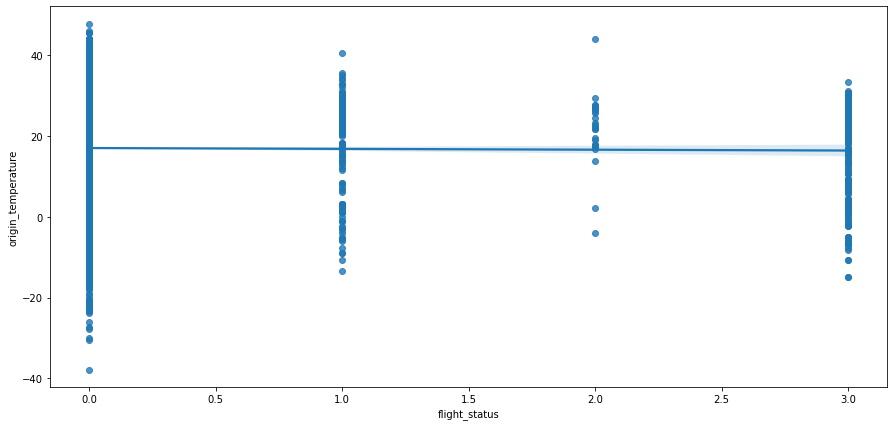

In [95]:
df['flight_status'] = pd.Categorical(df['flight_status'],ordered=True)
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="origin_temperature", data=df, ax=ax)

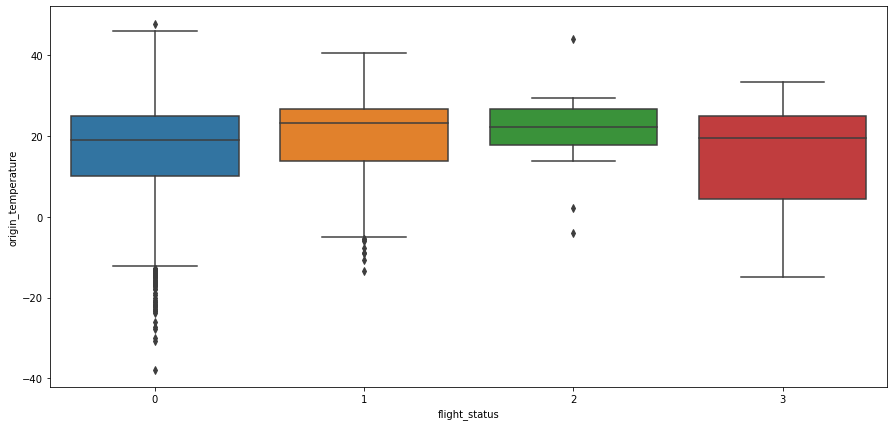

In [98]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="origin_temperature", data=df, ax=ax)

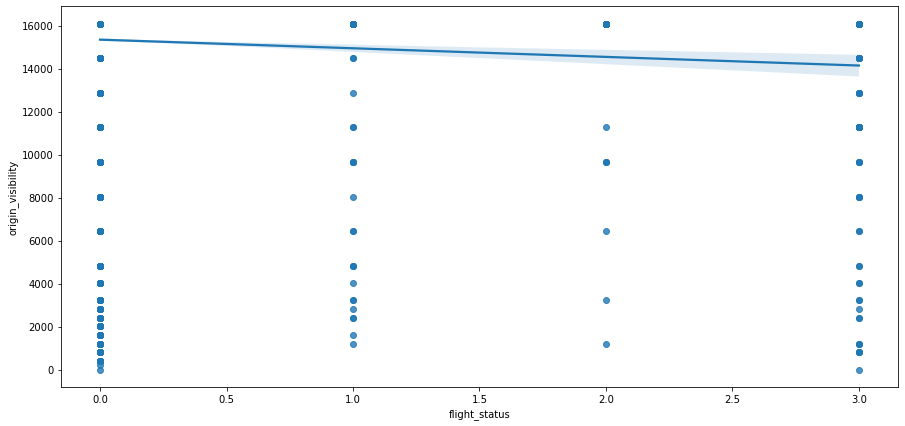

In [96]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="origin_visibility", data=df, ax=ax)

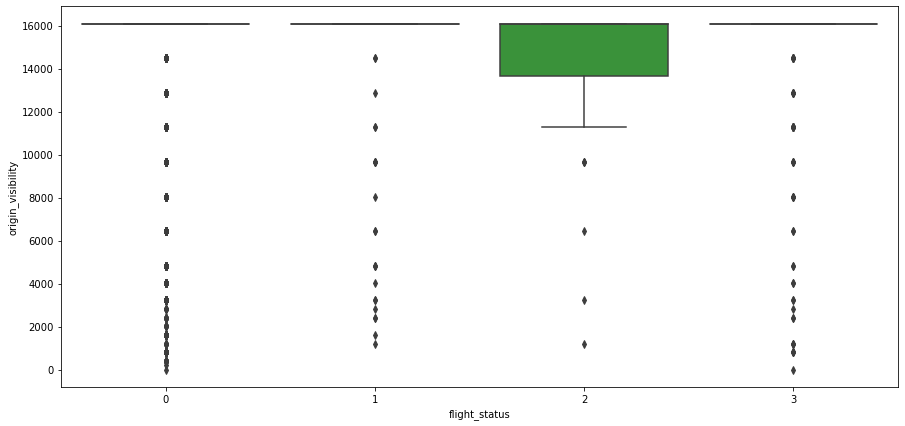

In [107]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="origin_visibility", data=df, ax=ax)

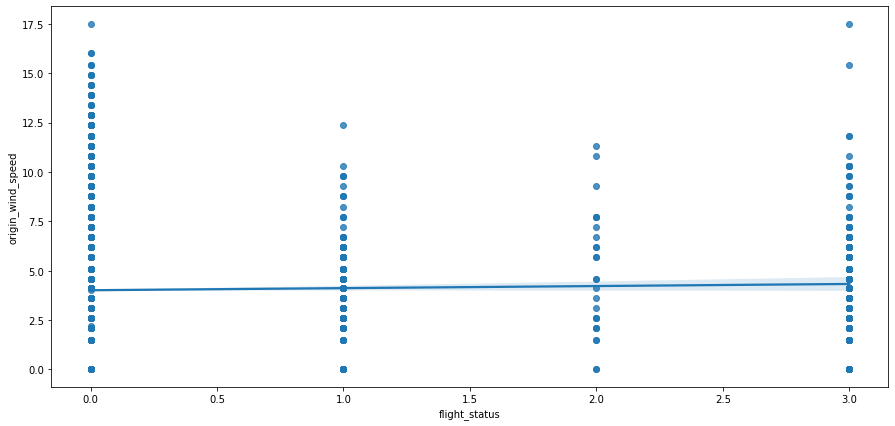

In [99]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="origin_wind_speed", data=df, ax=ax)

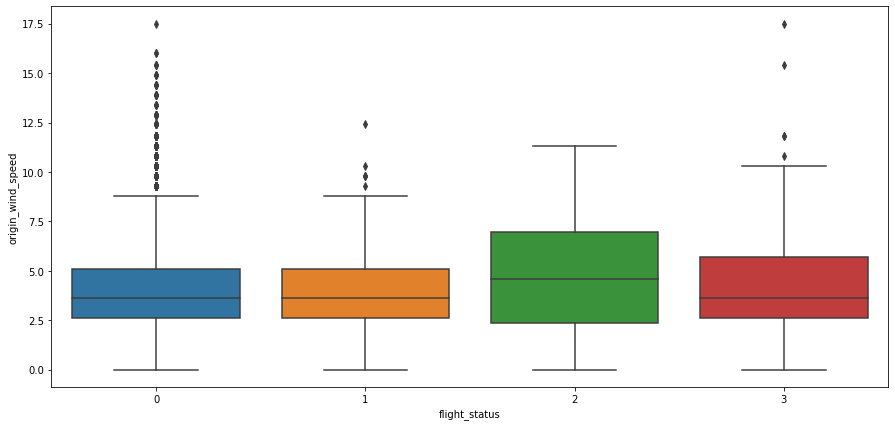

In [108]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="origin_wind_speed", data=df, ax=ax)

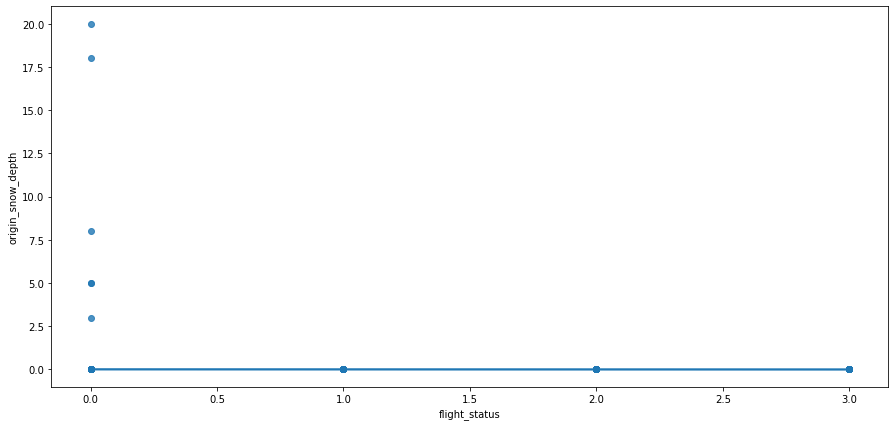

In [100]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="origin_snow_depth", data=df, ax=ax)

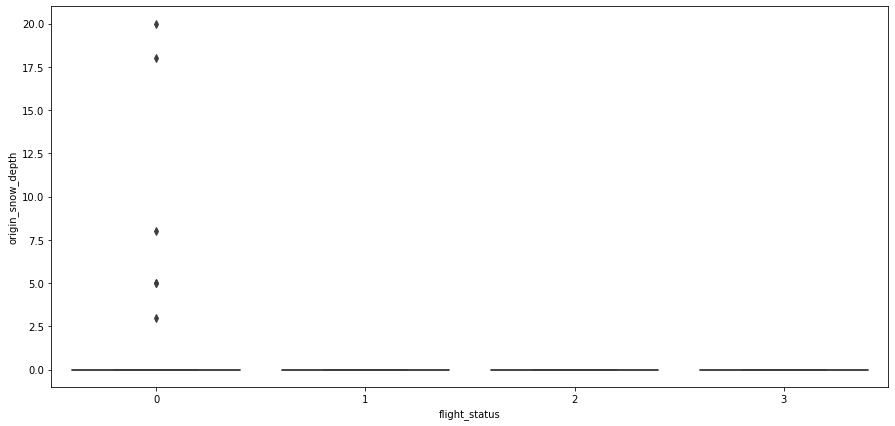

In [109]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="origin_snow_depth", data=df, ax=ax)

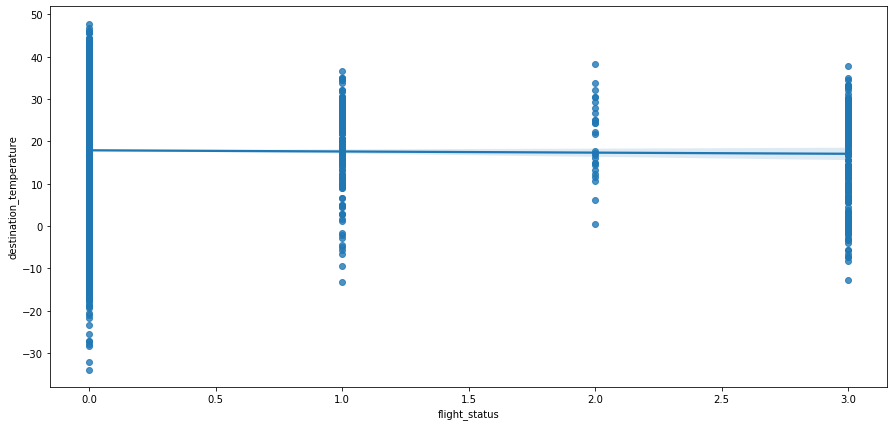

In [103]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="destination_temperature", data=df, ax=ax)

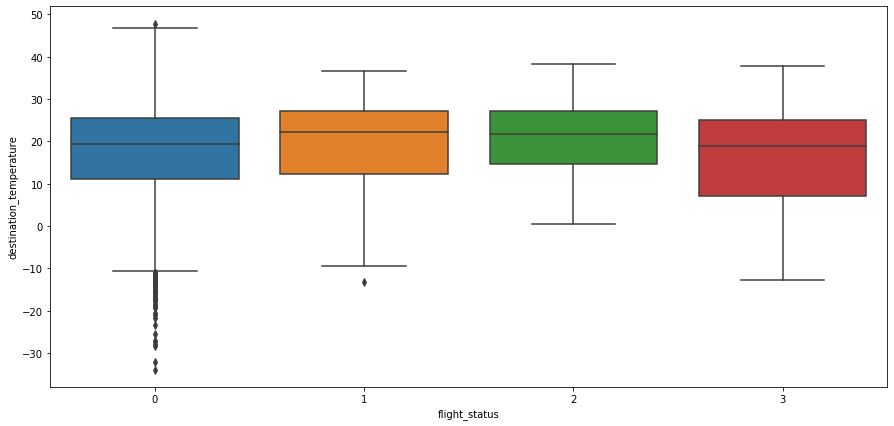

In [110]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="destination_temperature", data=df, ax=ax)

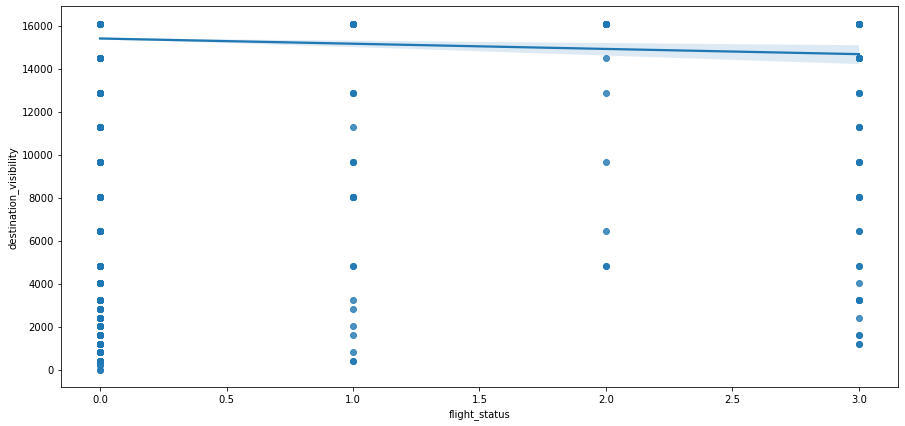

In [104]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="destination_visibility", data=df, ax=ax)

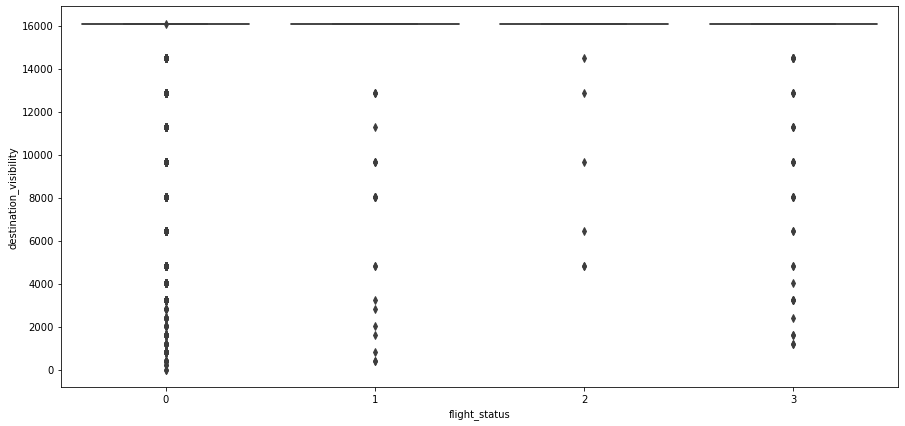

In [111]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="destination_visibility", data=df, ax=ax)

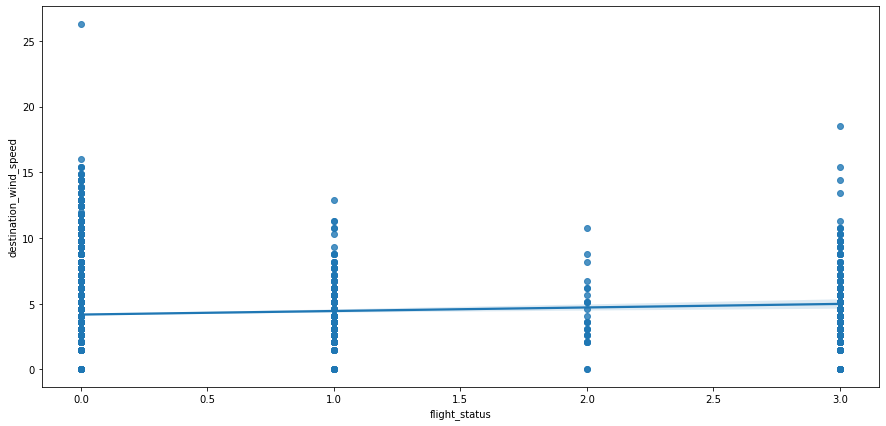

In [105]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="destination_wind_speed", data=df, ax=ax)

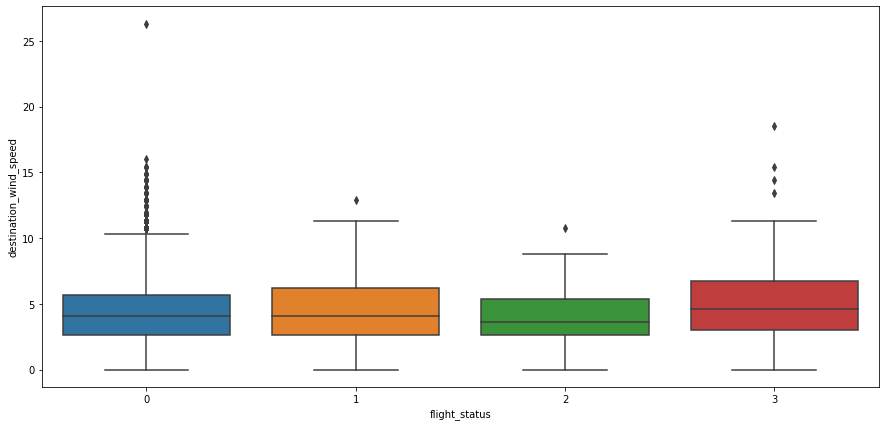

In [112]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="destination_wind_speed", data=df, ax=ax)

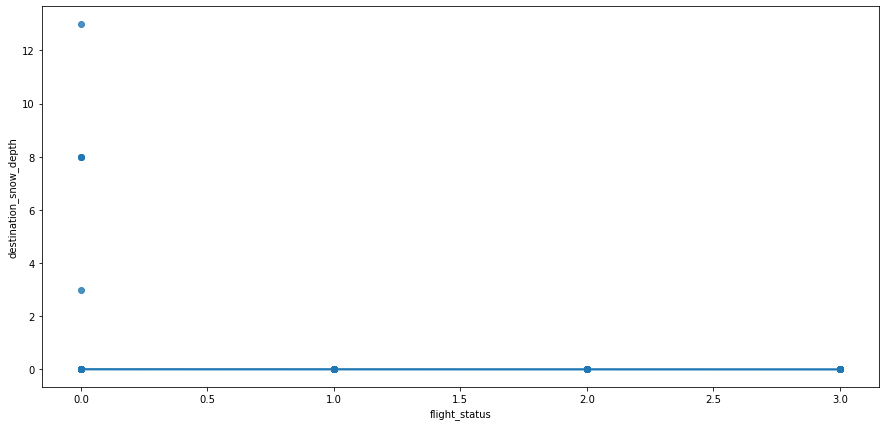

In [106]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="flight_status", y="destination_snow_depth", data=df, ax=ax)

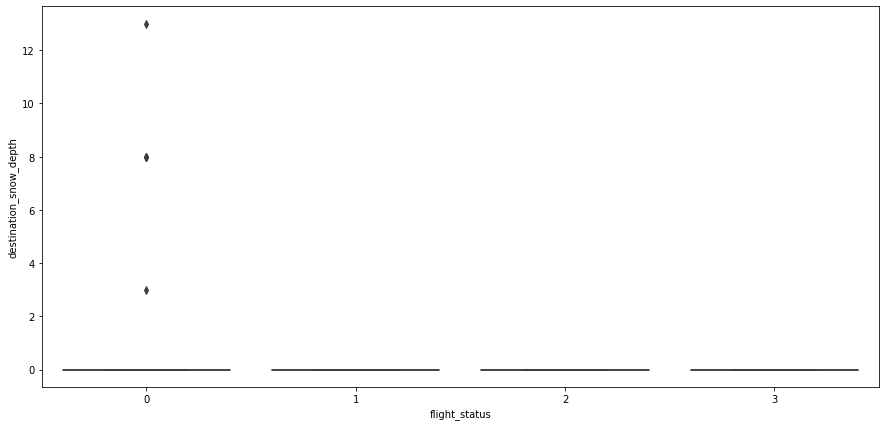

In [113]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="flight_status", y="destination_snow_depth", data=df, ax=ax)

# Conclusion

- ***The dataset is imbalanced in terms of `flight status`, in which 'on_schedule' flights dominate the majority of records. Therefore, Random Forest model is chosen to handle this task.***
- ***Data in `flight_traffic.csv` and `weather.csv` is merged by matching `timestamp` and `airport_id`.***
- ***`temperature`, `visibility`, `wind_direction`, `wind_speed`, `snow_depth` at both `origin_airport` and `destination_airport` are the weather features.***
- ***`on_schedule`, `delayed`, `diverted`, `cancelled` are the 4 labels, denoted by `0`, `1`, `2`, `3`.
- ***The Random Forest Classifier achieves around 95% accuracy on test data.***
- ***From the plots, we can find out that with a LOWER `visibility` or a HIGHER `wind_speed`, flights are more prone to be `delayed`, `diverted` or `cancelled`.***